In [8]:
BENCHMARK_FILE = 'data/benchmark.csv'
PAIRWISE_FILE = 'data/pairwise.csv'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set();

In [10]:
names = ['file', 'extractor', 'references', 'validated', 'time_ms']
types = ['str', 'str', 'int', 'int', 'int']
benchmark_data = pd.read_csv(BENCHMARK_FILE, 
                             names=names,
                             dtype=dict(zip(names, types)))
benchmark_data['parsed_smth'] = benchmark_data['references'] > 0

In [11]:
benchmark_data[:100]

,file,extractor,references,validated,time_ms,parsed_smth
0,0902.0765,Custom,65,51,1067,True
1,0902.0765,Grobid,65,51,1238,True
2,0902.0578,Custom,13,2,146,True
3,0902.0578,Grobid,13,2,291,True
4,0902.0300,Custom,33,25,273,True
...,...,...,...,...,...,...
95,0902.0075,Grobid,44,21,629,True
96,0902.0161,Custom,22,11,464,True
97,0902.0161,Grobid,22,11,1297,True
98,0902.0492,Custom,35,15,394,True


In [12]:
benchmark_data.groupby('extractor').agg(
    average_references=pd.NamedAgg(column='references', aggfunc='mean'),
    average_validated=pd.NamedAgg(column='validated', aggfunc='mean'),
    average_time_ms=pd.NamedAgg(column='time_ms', aggfunc='mean'),
    parsed_files=pd.NamedAgg(column='parsed_smth', aggfunc='sum'),
    total_files=pd.NamedAgg(column='parsed_smth', aggfunc='count')
)

,average_references,average_validated,average_time_ms,parsed_files,total_files
extractor,,,,,
Custom,33.521200,19.039297,543.927611,943.0,967
Grobid,34.448811,19.426060,778.563599,945.0,967


In [21]:
file = open(PAIRWISE_FILE, 'r')
names = file.readline().split(",")
lines = file.readlines()
for line in lines:
    name1, name2, cnt = line.split(",")
    print(name1 + " parsed " + str(cnt) + " references that didn't parse " + name2)

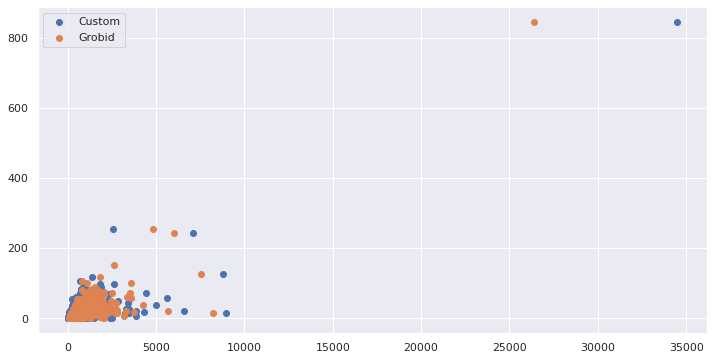

In [22]:
plt.figure(figsize=(12, 6))
for key, grp in benchmark_data.groupby(['extractor']):
    plt.scatter(grp['time_ms'], grp['validated'], label=key)
plt.legend()
plt.show()